In [166]:
import pandas as pd

In [167]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [168]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [169]:
from plotly import offline
from plotly import graph_objs as go

offline.init_notebook_mode()

# Генерация новых

### Категориальные переменные

##### Флажок наличия-отсутствия как бинарный признак

In [170]:
t = pd.DataFrame(data={'color': ['green', 'green', 'red', 'red', 'blue', 'orange', 'unknown', 'unknown']})
t

,color
0,green
1,green
2,red
3,red
4,blue
5,orange
6,unknown
7,unknown


In [171]:
t['hasColor'] = 1
t.loc[t.color == 'unknown', 'hasColor'] = 0
t

,color,hasColor
0,green,1
1,green,1
2,red,1
3,red,1
4,blue,1
5,orange,1
6,unknown,0
7,unknown,0


##### Сочетание или разбиение признаков

In [172]:
t = pd.DataFrame(data={
    'color': ['green', 'green', 'red', 'red', 'blue', 'orange', 'unknown', 'unknown'],
    'class': [10, 9, 10, 9, 8, 8, 7, 7],
    'email': ['doe@mail.ru', 'john@gmail.com', 'pat@mail.ru', 'dog@doggo.bark', 
              'ret@ret.ru', 'pal@ret.ru', 'qaz@mail.ru', 'josh@gmail.com'
             ]
})
t

,class,color,email
0,10,green,doe@mail.ru
1,9,green,john@gmail.com
2,10,red,pat@mail.ru
3,9,red,dog@doggo.bark
4,8,blue,ret@ret.ru
5,8,orange,pal@ret.ru
6,7,unknown,qaz@mail.ru
7,7,unknown,josh@gmail.com


In [174]:
t['classColor'] = t.apply(lambda row: row['color'] + '__' + str(row['class']), axis=1)
t['domain'] = t.email.apply(lambda s: s.split('@')[-1])
t

,class,color,email,classColor,domain
0,10,green,doe@mail.ru,green__10,mail.ru
1,9,green,john@gmail.com,green__9,gmail.com
2,10,red,pat@mail.ru,red__10,mail.ru
3,9,red,dog@doggo.bark,red__9,doggo.bark
4,8,blue,ret@ret.ru,blue__8,ret.ru
5,8,orange,pal@ret.ru,orange__8,ret.ru
6,7,unknown,qaz@mail.ru,unknown__7,mail.ru
7,7,unknown,josh@gmail.com,unknown__7,gmail.com


##### Токенизация + бинаризация строки

In [175]:
t = pd.DataFrame(data={'comment': ['Very good', 'Nice', 'Really nice', 'Awesomely good']})
t

,comment
0,Very good
1,Nice
2,Really nice
3,Awesomely good


In [176]:
from sklearn.feature_extraction.text import CountVectorizer

In [177]:
cv = CountVectorizer()

In [178]:
cv.fit(t.comment);

In [179]:
pd.DataFrame(data=cv.transform(t.comment).toarray(), \
             columns=['word=%s' % x for x in cv.get_feature_names()]) 

,word=awesomely,word=good,word=nice,word=really,word=very
0,0,1,0,0,1
1,0,0,1,0,0
2,0,0,1,1,0
3,1,1,0,0,0


### Вещественные переменные

##### Разбиение на бины

In [180]:
t = pd.DataFrame(data={'age': [15,18, 19,20,30, 45,50, 64,77]})
t

,age
0,15
1,18
2,19
3,20
4,30
5,45
6,50
7,64
8,77


In [181]:
t['rank'] = pd.cut(t.age, bins=[0, 18, 30, 60, 120], 
                   labels=['teen', 'young people', 'adult', 'aged'])
t

,age,rank
0,15,teen
1,18,teen
2,19,young people
3,20,young people
4,30,young people
5,45,adult
6,50,adult
7,64,aged
8,77,aged


In [182]:
t = pd.DataFrame(data={'x': range(100)})
t.head()

,x
0,0
1,1
2,2
3,3
4,4


In [184]:
quantiles = 4
t['bin'] = pd.qcut(t.x, quantiles, labels=list(range(quantiles)))

In [18]:
t.head(30)

,x,bin
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


##### Выделение разряда или части

In [185]:
t = pd.DataFrame(data={
    'product': ['A', 'B', 'C'],
    'weight (kg with gramms)': [6.120, 7.735, 83.4], 
})
t

,product,weight (kg with gramms)
0,A,6.120
1,B,7.735
2,C,83.400


In [186]:
t['weight (kg)'] = t['weight (kg with gramms)'].apply(lambda x: int(x))
t['weight remain'] = t['weight (kg with gramms)'] - t['weight (kg)']
t.drop('weight (kg with gramms)', axis=1, inplace=True)
t

,product,weight (kg),weight remain
0,A,6,0.120
1,B,7,0.735
2,C,83,0.400


In [187]:
t = pd.DataFrame(data={
    'product': ['A', 'B', 'C', 'D'],
    'sum (roubles)': [999, 1200, 470, 2204]
})
t

,product,sum (roubles)
0,A,999
1,B,1200
2,C,470
3,D,2204


In [188]:
t['thousands'] = t['sum (roubles)'] // 1000
t['hundreds'] = t['sum (roubles)'] // 100 - t['thousands']*10
t

,product,sum (roubles),thousands,hundreds
0,A,999,0,9
1,B,1200,1,2
2,C,470,0,4
3,D,2204,2,2


### Дата и время

##### Декомпозиция

In [189]:
t = pd.DataFrame(data={
    'purchase': ['car', 'hammer', 'egg', 'laptop', 'peach'],
    'time': pd.date_range('6/7/2017 07:30', periods=5, freq='H')
})
t

,purchase,time
0,car,2017-06-07 07:30:00
1,hammer,2017-06-07 08:30:00
2,egg,2017-06-07 09:30:00
3,laptop,2017-06-07 10:30:00
4,peach,2017-06-07 11:30:00


In [190]:
t['dayOfWeek'] = t.time.apply(lambda dt: dt.dayofweek)
t['month'] = t.time.apply(lambda dt: dt.month)
t['day'] = t.time.apply(lambda dt: dt.day)
t['quarter'] = t.time.apply(lambda dt: dt.quarter)
# ...
# and so on
# ...
t['hour'] = t.time.apply(lambda dt: dt.hour)
t['minute'] = t.time.apply(lambda dt: dt.hour)

t

,purchase,time,dayOfWeek,month,day,quarter,hour,minute
0,car,2017-06-07 07:30:00,2,6,7,2,7,7
1,hammer,2017-06-07 08:30:00,2,6,7,2,8,8
2,egg,2017-06-07 09:30:00,2,6,7,2,9,9
3,laptop,2017-06-07 10:30:00,2,6,7,2,10,10
4,peach,2017-06-07 11:30:00,2,6,7,2,11,11


__Не забудьте:__ 
* признак дня недели
* признак для выходного дня
* значимые дни, связанные с внешними событиями (например, аномальной погодой)
* значимые дни, связанные с принятыми распорядками (дни выдач зарплат или покупки проездного в начале месяца)

И так далее!

##### Гармонические функции

In [191]:
from datetime import datetime

In [192]:
t = pd.DataFrame(data={'time': [
    pd.Timestamp(datetime(2017,7,7, 1)),
    pd.Timestamp(datetime(2017,7,7, 6)),
    pd.Timestamp(datetime(2017,7,7, 10)),
    pd.Timestamp(datetime(2017,7,7, 12)),
    pd.Timestamp(datetime(2017,7,7, 14)),
    pd.Timestamp(datetime(2017,7,7, 18)),
    pd.Timestamp(datetime(2017,7,7, 23)),
]})
t

,time
0,2017-07-07 01:00:00
1,2017-07-07 06:00:00
2,2017-07-07 10:00:00
3,2017-07-07 12:00:00
4,2017-07-07 14:00:00
5,2017-07-07 18:00:00
6,2017-07-07 23:00:00


In [193]:
t['hourPeriod'] = t.time.apply(lambda x: np.pi * x.hour / 12.0)
t['hourCos'] = np.cos(t.hourPeriod)
t['hourSin'] = np.sin(t.hourPeriod)
t.drop('hourPeriod', axis=1, inplace=True)
t

,time,hourCos,hourSin
0,2017-07-07 01:00:00,9.659258e-01,2.588190e-01
1,2017-07-07 06:00:00,6.123234e-17,1.000000e+00
2,2017-07-07 10:00:00,-8.660254e-01,5.000000e-01
3,2017-07-07 12:00:00,-1.000000e+00,1.224647e-16
4,2017-07-07 14:00:00,-8.660254e-01,-5.000000e-01
5,2017-07-07 18:00:00,-1.836970e-16,-1.000000e+00
6,2017-07-07 23:00:00,9.659258e-01,-2.588190e-01


In [194]:
print('Hrs: ', '\t'.join(t.time.apply(lambda x: str(x.hour).rjust(2, ' '))))
print('Cos: ', '\t'.join(['%.3f' % x for x in t.hourCos]))
print('Sin: ', '\t'.join(['%.3f' % x for x in t.hourSin]))

Hrs:   1	 6	10	12	14	18	23
Cos:  0.966	0.000	-0.866	-1.000	-0.866	-0.000	0.966
Sin:  0.259	1.000	0.500	0.000	-0.500	-1.000	-0.259


__Домашка__: посчитать вместе с минутами

### Геоданные

##### Нахождение расстояний

In [195]:
from folium import Map, CircleMarker
import colorsys

In [196]:
from sklearn.datasets import fetch_california_housing

In [197]:
bunch = fetch_california_housing()

In [198]:
X, y = pd.DataFrame(data=bunch.data, columns=bunch.feature_names), bunch.target
X['target'] = y

In [199]:
X.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [208]:
california_map = Map(location=(37.88, -122.23), 
#                      tiles='Mapbox Bright',
                     zoom_start=6)

In [210]:
# california_map

In [211]:
get_radius = lambda x: (x - min_)/(max_ - min_)*7 + 3

rgbhex = lambda rgb: '#'+"".join("%02X" % i for i in rgb)
get_fill_color = lambda x: rgbhex(tuple(int(i * 255) for i in \
                                   colorsys.hsv_to_rgb(x/max_*120.0/360.0, 0.56, 0.84)))
get_border_color = lambda x: rgbhex(tuple(int(i * 255) for i in \
                                   colorsys.hsv_to_rgb(x/max_*120.0/360.0, 0.78, 0.36)))

add_marker = lambda lat, lon, target: \
    CircleMarker((lat, lon), 
                 radius     = get_radius(target), 
                 color      = get_border_color(target),
                 fill_color = get_fill_color(target), 
                 popup='Lat: %.3f; Lon: %.3f' % (lat, lon),
                    )\
    .add_to(california_map)

In [212]:
min_, max_ = X[['target']].describe().loc['min'][0], X[['target']].describe().loc['max'][0]

In [213]:
X.sample(n=1000).apply(lambda row: add_marker(row['Latitude'], row['Longitude'], row['target']), axis=1);

In [217]:
# california_map

##### Геокодирование

In [223]:
import geopy

In [224]:
geolocator = geopy.Nominatim()

In [225]:
X['coordinate'] = X.Latitude.astype(str) + ', ' + X.Longitude.astype(str)

In [226]:
locations = X[:5].coordinate.apply(geolocator.reverse)

In [227]:
locations[1].raw

{'address': {'city': 'Oakland',
  'country': 'United States of America',
  'country_code': 'us',
  'county': 'Alameda County',
  'road': 'Tunnel Road',
  'state': 'California'},
 'boundingbox': ['37.8559848', '37.860283', '-122.220852', '-122.2143103'],
 'display_name': 'Tunnel Road, Oakland, Alameda County, California, United States of America',
 'lat': '37.8573745',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright',
 'lon': '-122.2179697',
 'osm_id': '24501520',
 'osm_type': 'way',
 'place_id': '74159255'}

##### Расстояния

In [228]:
from geopy.distance import vincenty

In [229]:
best = (37.8, -122.410)

In [230]:
X['coordinate'] = [(a,b) for a,b in zip(X.Latitude, X.Longitude)]
X['distance_to_best'] = X.coordinate.apply(lambda x: vincenty(x, best).miles)
X.drop(['coordinate'], axis=1, inplace=True)

In [231]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,distance_to_best
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,11.285739
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,11.186921
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,9.918759
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,9.407748
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,9.407748


### Временные ряды

In [232]:
import seaborn as sns

from datetime import datetime

In [233]:
df = sns.load_dataset('flights')

df['full_str_date'] = df.month.astype(str) + " " + df.year.astype(str)

df['dt'] = df.full_str_date.apply(lambda d: datetime.strptime(d, '%B %Y'))

df.drop(['full_str_date'], axis=1, inplace=True)
df.drop(['year', 'month'], axis=1, inplace=True)

df.rename(columns={'passengers': 'y', 'dt': 'ds'}, inplace=True)

In [234]:
df.head()

,y,ds
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


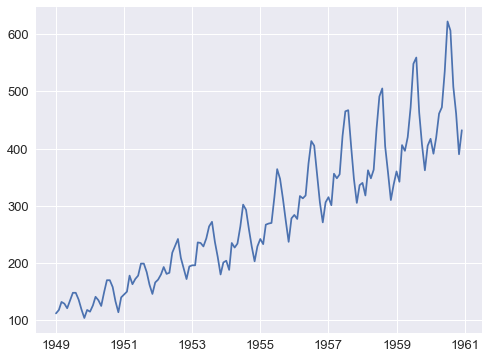

In [235]:
plt.figure(figsize=(8,6));
plt.plot(df.ds, df.y);

In [236]:
df_logd = df.copy()

df_logd.y = np.log(df_logd.y)

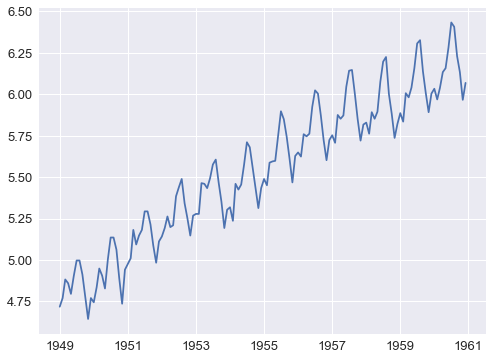

In [237]:
plt.figure(figsize=(8,6));
plt.plot(df_logd.ds, df_logd.y);

In [238]:
from fbprophet import Prophet

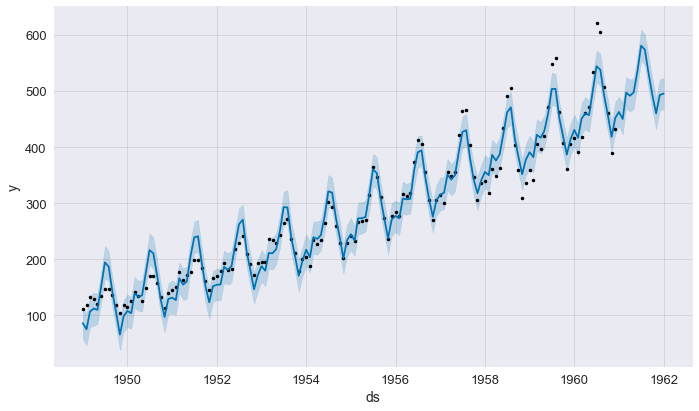

In [239]:
m = Prophet()
m.fit(df);

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast);

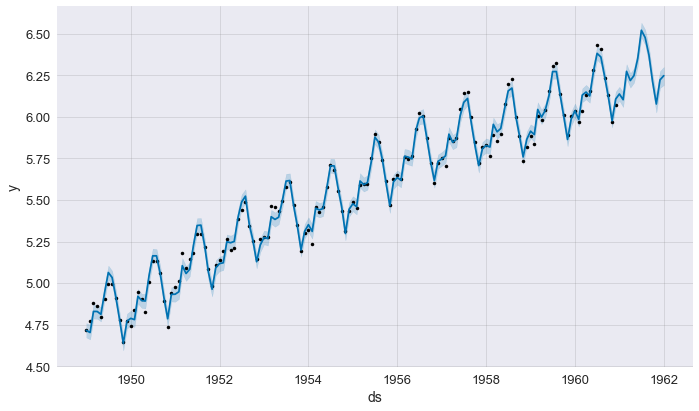

In [240]:
m = Prophet()
m.fit(df_logd);

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast);

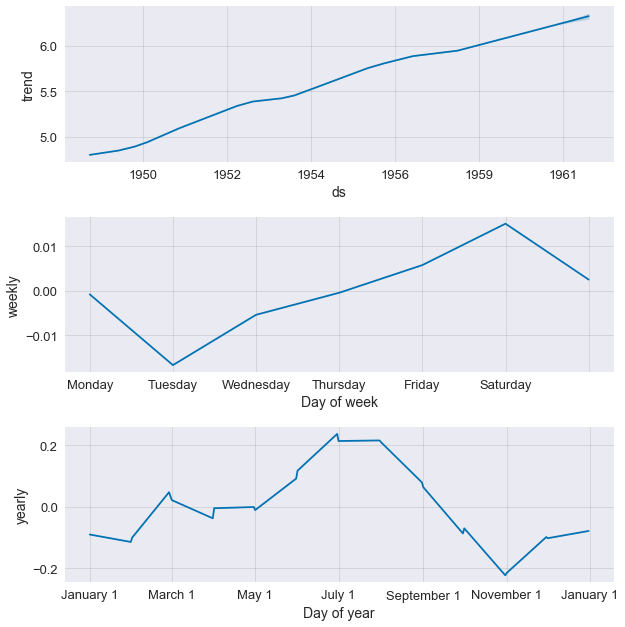

In [242]:
m.plot_components(forecast);

# Обработка имеющихся

### Масштабирование по отрезку

$$ \hat{x} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [243]:
t = pd.DataFrame(data={'a': [10,20,30]})
t

,a
0,10
1,20
2,30


In [244]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
mms = MinMaxScaler(feature_range=(0,10))
t.a = mms.fit_transform(t)
t

,a
0,0.0
1,5.0
2,10.0


Полезно для визуализации: удобно переместить на `[0;255]`.

### Центрирование

$$ \hat{x} = x - \mu $$

In [247]:
t = pd.DataFrame(data={'x': [1,2,3,4,5]})
t

,x
0,1
1,2
2,3
3,4
4,5


In [248]:
t.x -= np.mean(t.x)
t

,x
0,-2.0
1,-1.0
2,0.0
3,1.0
4,2.0


### Нормализация


$$ z = \frac{x-\mu}{\sigma} $$

In [249]:
from sklearn.preprocessing import StandardScaler  

In [250]:
t = pd.DataFrame(data={'x': [1,2,3,5,6,10]})
t

,x
0,1
1,2
2,3
3,5
4,6
5,10


In [251]:
ss = StandardScaler()
t.x = ss.fit_transform(t)
t

,x
0,-1.172106
1,-0.837218
2,-0.502331
3,0.167444
4,0.502331
5,1.841880


<div class="panel panel-danger" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Важно!</h3> 
    </div>
</div>

### Сведение к нормальному распределению и преобразования Бокса-Кокса

Параметрические методы обычно требуют как минимум симметричного и унимодального распределения данных, что не всегда обеспечивается реальным миром.

In [252]:
from scipy import stats

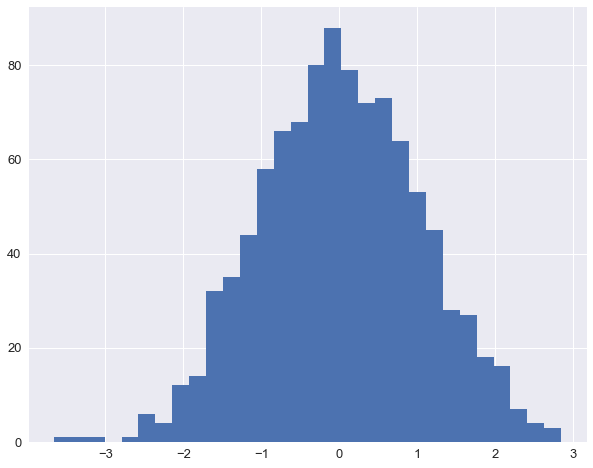

In [253]:
normal_data = stats.norm().rvs(1000)
plt.hist(normal_data, bins=30);

In [254]:
stats.describe(normal_data)

DescribeResult(nobs=1000, minmax=(-3.6614355695034542, 2.8466025604229386), mean=0.015997047290401044, variance=1.0569328103189926, skewness=-0.01990701463772594, kurtosis=-0.1721178977109563)

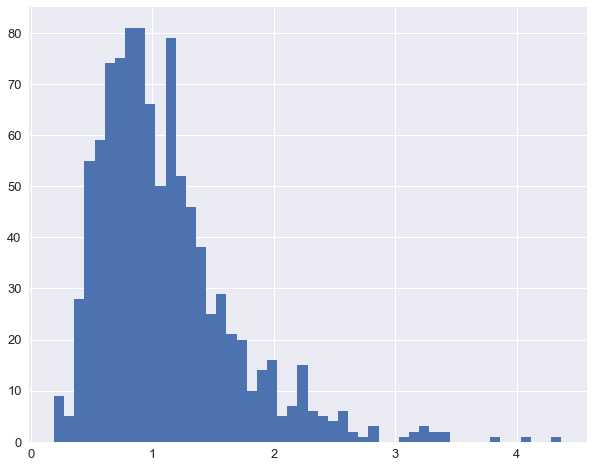

In [255]:
data = stats.lognorm(s=0.5).rvs(1000)
plt.hist(data, bins=50);

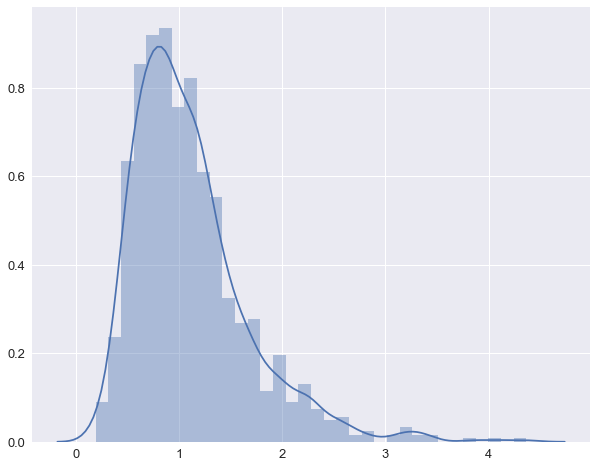

In [257]:
sns.distplot(data);

In [258]:
stats.describe(data)

DescribeResult(nobs=1000, minmax=(0.19030112118730319, 4.3659840766018787), mean=1.1044197747457751, variance=0.31575994100106519, skewness=1.5627429221239537, kurtosis=3.8059540005278416)

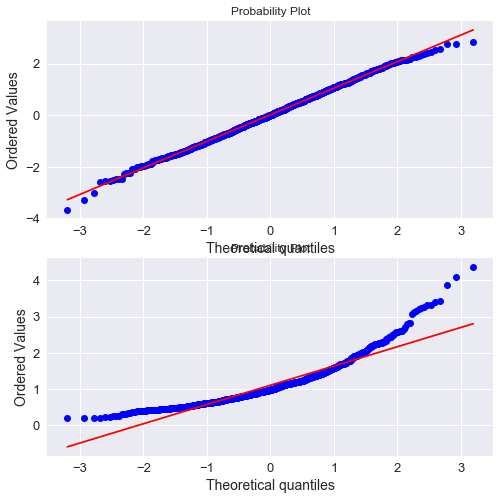

In [260]:
f, axs = plt.subplots(2,1, figsize=(8, 8))
prob = stats.probplot(normal_data, dist=stats.norm, plot=axs[0])
prob = stats.probplot(data, dist=stats.norm, plot=axs[1])

In [262]:
print(stats.normaltest(normal_data))
print(stats.normaltest(data))

NormaltestResult(statistic=1.3052659674756169, pvalue=0.52067304670142378)
NormaltestResult(statistic=318.15702776805074, pvalue=8.1861411891513034e-70)


In [263]:
normalized_data, _ = stats.boxcox(data)

In [264]:
print(stats.normaltest(normalized_data))

NormaltestResult(statistic=1.2870084925455914, pvalue=0.52544789526050562)


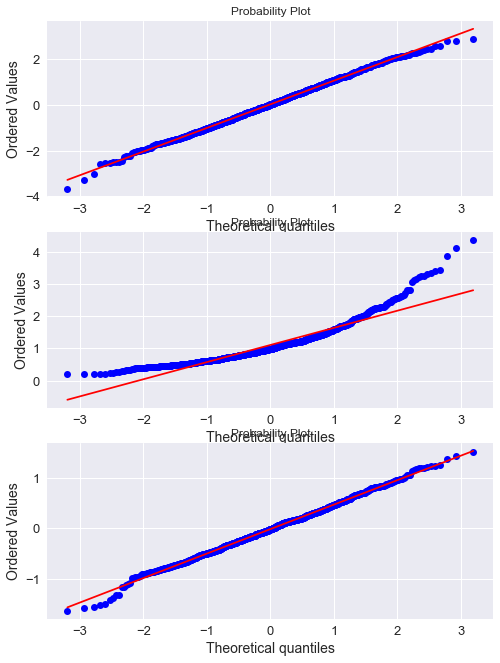

In [265]:
f, axs = plt.subplots(3,1, figsize=(8, 11))
stats.probplot(normal_data, dist=stats.norm, plot=axs[0]);
stats.probplot(data, dist=stats.norm, plot=axs[1]);
stats.probplot(normalized_data, dist=stats.norm, plot=axs[2]);

# Кодирование признаков

## LabelBinarizer, или one-hot-кодирование

In [266]:
df = pd.DataFrame(data={'city': ['Воронеж', 'Воронеж', 'Липецк', 'Москва'], 
                        'street': ['A', 'B', 'C', 'D'],
                        'day': [17, 19, 18, 15], 'temperature': [33., 12., 18., 15]})

In [267]:
df

,city,day,street,temperature
0,Воронеж,17,A,33.0
1,Воронеж,19,B,12.0
2,Липецк,18,C,18.0
3,Москва,15,D,15.0


In [268]:
from sklearn.preprocessing import LabelBinarizer

In [269]:
lb = LabelBinarizer()

In [270]:
lb.fit_transform(df.city)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [271]:
lb.classes_

array(['Воронеж', 'Липецк', 'Москва'], 
      dtype='<U7')

In [272]:
lb.transform(pd.Series(['Киров']))

array([[0, 0, 0]])

In [275]:
def one_hot_encode(df, columns=None):
    from sklearn.preprocessing import LabelBinarizer
    
    if columns is None:
        columns = df.select_dtypes(include=['object']).columns.values
    rest = [x for x in df.columns.values if x not in columns]
    
    chunks = []
    for c in columns:
        lb = LabelBinarizer()
        data = lb.fit_transform(df[c])
        names = [c + '=' + str(x) for x in lb.classes_]
        chunks.append(pd.DataFrame(data=data, columns=names))
    
    chunks.insert(0, df[rest])
    return pd.concat(chunks, axis=1)

In [276]:
one_hot_encode(df)

,day,temperature,city=Воронеж,city=Липецк,city=Москва,street=A,street=B,street=C,street=D
0,17,33.0,1,0,0,1,0,0,0
1,19,12.0,1,0,0,0,1,0,0
2,18,18.0,0,1,0,0,0,1,0
3,15,15.0,0,0,1,0,0,0,1


## LabelEncoder, или порядковое кодирование

In [277]:
df = pd.DataFrame(data={
    'name': ['Вася', 'Петя', 'Коля', 'Толя'],
    'highest_grad': ['Высшее', 'Среднее специальное', 'Высшее', 'Неоконченное среднее']
})
df

,highest_grad,name
0,Высшее,Вася
1,Среднее специальное,Петя
2,Высшее,Коля
3,Неоконченное среднее,Толя


In [278]:
from sklearn.preprocessing import LabelEncoder

In [279]:
le = LabelEncoder()

In [280]:
le.fit_transform(df.highest_grad)

array([0, 2, 0, 1])

In [281]:
le.classes_

array(['Высшее', 'Неоконченное среднее', 'Среднее специальное'], dtype=object)

## CountVectorizer, или мешок слов

In [283]:
t = pd.DataFrame(data={'words': ['one two', 'two', 'two one two', 'one one three', 'three']})
t

,words
0,one two
1,two
2,two one two
3,one one three
4,three


In [284]:
from sklearn.feature_extraction.text import CountVectorizer

In [285]:
cv = CountVectorizer()

In [286]:
cv.fit(t.words);

In [287]:
pd.DataFrame(data=cv.transform(t.words).toarray(), \
             columns=['word=%s' % x for x in cv.get_feature_names()]) 

,word=one,word=three,word=two
0,1,0,1
1,0,0,1
2,1,0,2
3,2,1,0
4,0,1,0


# В заключении

__LabelEncoder__, конечно, представляют категории в виде чисел, но обратной стороной здесь является и числовая непрерывность:
__`[cat, mouse, cat, dog]`__, переведенные в массив __`[1,0,1,2]`__, удовлетворяют странному свойству: среднее арифметическое от __`mouse`__ и __`dog`__ внезапно становится равным __`cat`__.

Однако некоторые типы алгоритмов, как решающие деревья, вполне с этим справляются и работают на таких данных правильно. Собственно, это же толкает к применению подобного рода кодирования, когда речь заходит об экономии дискового пространства в случаях работы с большими датасетами.

One-hot-кодирование (__LabelBinarizer__) и его композиция значений на разные признаки (считайте что на ортогональные базисы) - внушительное преимущество, здорово помогающее многим алгоритмам. Плата за такое - чрезвычайно быстро увеличивающаяся размерность признакового пространства.

В качестве лайфхака иногда принято проецировать результат методом главных компонент (__[PCA](http://scikit-learn.org/stable/modules/decomposition.html#pca)__, `Principal Component Analysis`) на подспространство меньшей размерности, чтобы соблюсти баланс между объемом захваченной полезной информации (см. поле __explained_variance_ratio__ у `PCA`) и количеством признаков.

In [288]:
# TODO: сохраняют дистанцию